<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this hands-on, we are going to use a fun dataset to plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

`

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

### Initial exploring
First let's take this dataset and do some initial exploring such as looking at the different columns and their datatype, looking at the header, evaluating the dimensions.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pok = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv')
pok.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
## What is a quick way to get some information on the dataset such as datatype and dimension?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
## Missing data. While there does not seem to be any missing data, what is a way you can check if there any missing values in the dataset?
## How would you handle them?


,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


## Let's practice some basic data exploration
Answer the following questions below

In [ ]:
## How many Pokémon are there in total?


800

In [ ]:
## What is the average HP (Hit Points) of all Pokémon?


69.25875


In [ ]:
## Which Pokémon has the highest Attack stat?


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [ ]:
## Find the strongest Pokémon based on their Total stat (sum of all base stats).


,424
#,383
Name,GroudonPrimal Groudon
Type 1,Ground
Type 2,Fire
Total,530
HP,100
Attack,180
Defense,160
Sp. Atk,150
Sp. Def,90


In [ ]:
## What are the top 5 Pokémon with the highest total stats?


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


In [ ]:
## Q: Which Pokémon types are most common across the Type I?


,count
Type 1,
Water,112
Normal,98
Grass,70
Bug,69
Psychic,57
Fire,52
Rock,44
Electric,44
Ground,32


In [ ]:
## Are there any Pokémon that have both 'Type 1' and 'Type 2' being the same? How do you filter them?


## How can we do further exploration and data manipulation?

In [ ]:
## How would you categorize Pokémon based on their 'Speed' stat? (Consider creating a 'Speed category' column, where you have speed=0-50 is slow, speed=51-100 is average, and speed>101 is fast)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Speed Category
0,1,Bulbasaur,Grass,Poison,188,45,49,49,65,65,45,1,False,Slow
1,2,Ivysaur,Grass,Poison,245,60,62,63,80,80,60,1,False,Average
2,3,Venusaur,Grass,Poison,325,80,82,83,100,100,80,1,False,Average
3,3,VenusaurMega Venusaur,Grass,Poison,383,80,100,123,122,120,80,1,False,Average
4,4,Charmander,Fire,NaN,199,39,52,43,60,50,65,1,False,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,350,50,100,150,100,150,50,6,True,Slow
796,719,DiancieMega Diancie,Rock,Fairy,430,50,160,110,160,110,110,6,True,Fast
797,720,HoopaHoopa Confined,Psychic,Ghost,320,80,110,60,150,130,70,6,True,Average
798,720,HoopaHoopa Unbound,Psychic,Dark,380,80,160,60,170,130,80,6,True,Average


## Now let's practice with some plotting.

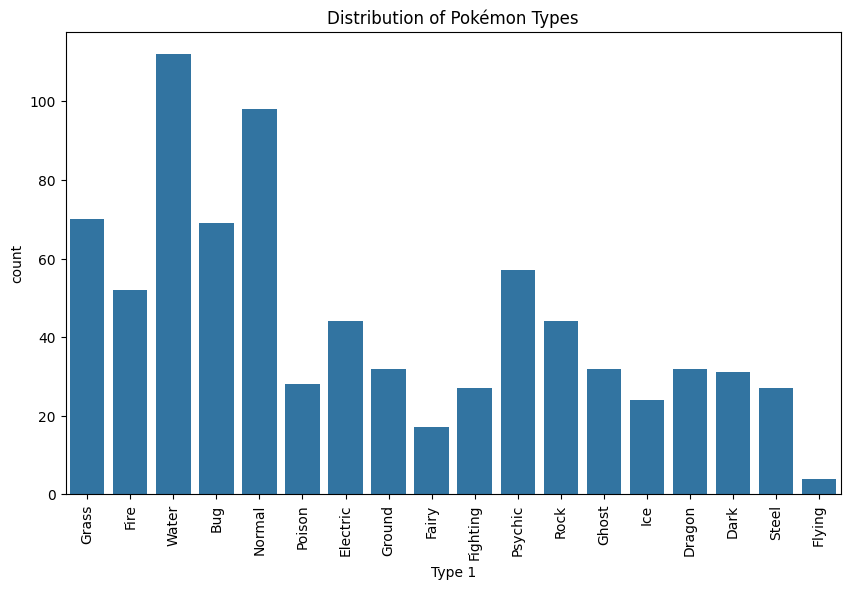

In [ ]:
## What is the distribution of Pokémon by their primary type ('Type 1')? (Visualize this)


<Figure size 1000x600 with 0 Axes>

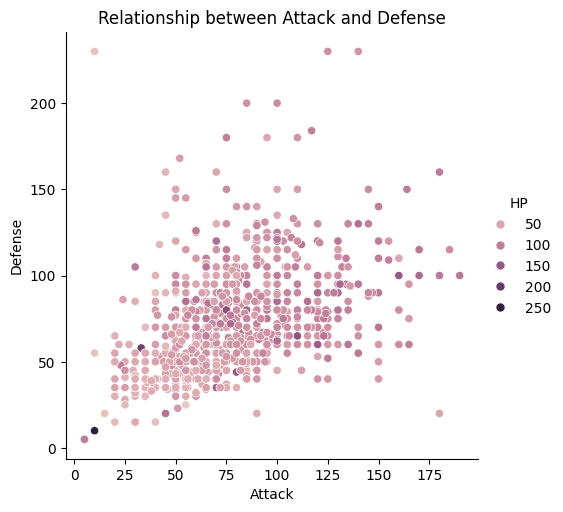

In [ ]:
## Plot the relationship between Attack and Defense
## Create a relationship plot using seaborn's `relplot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint.


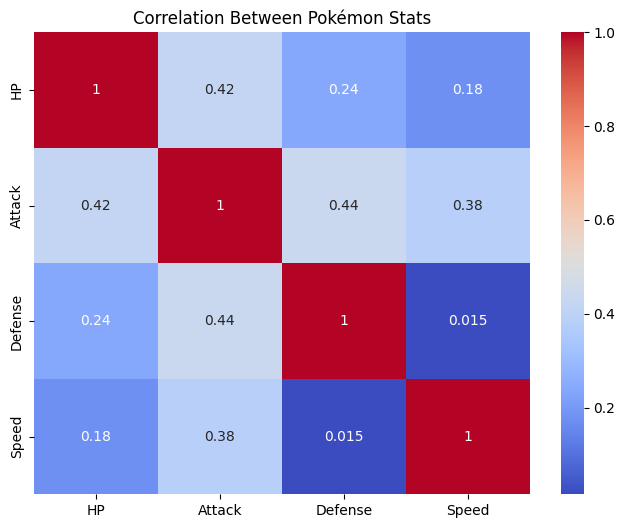

In [ ]:
## What is the correlation between the various base stats (e.g., Attack vs. Defense)? Visualize this correlation.
## You can use a heatmap to visualize this sns.heatmap


From the plot, I observed....

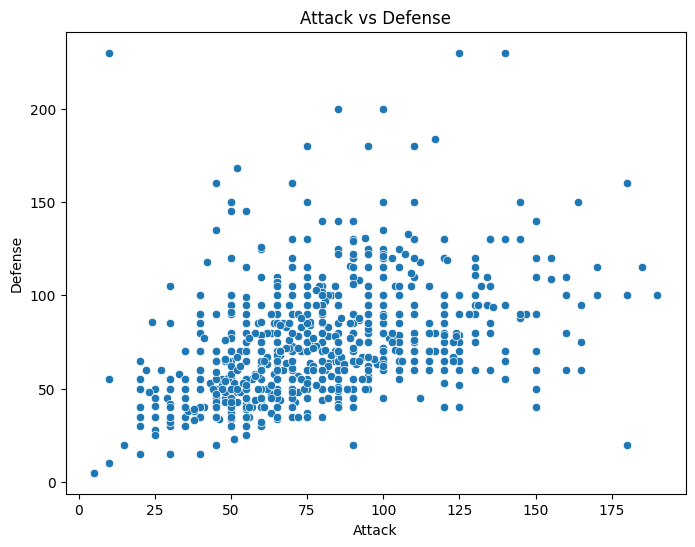

In [ ]:
## What is the relationship between 'Attack' and 'Defense'? Are there any Pokémon with unusually high or low values?
## You can use a relplot or scatterplot (sns)